$$\author{T.N.\,Olsthoorn}$$

# A well in a river bed (Question of Prof. Pieter van der Zaag,12/1/2017)

A river bed of of 100 m wide and 2 m thick within consisting of coarse sand lies in impervious bedrock. The river bed contains a layer of water. The idea is to extract this water with wells placed every 200 m along one side to extract 0.5 L/s. The bed is irregulary replenished by infiltration during episodes when the river flows.

Given this configuration the bed is subdivided hydraulically in blocs of 200 m, where the lines midway each pair of adjacent wells can be considered imporvious because they function as water divides as long as all wells have the same operation schedule. We can even limit our analysis to half such block, because also the lines perpendicuar to the river through the wells are water divides.

We can compute the drawdown and flow form the wells by using general well formulas that are valid for radial flow in an infinite aquifer and use (virtual) mirror wells to meet the boundary conditions, i.e. the zero-flow conditions at the water divides and at the impervious sides of the river bed.

The well pattern is generated below:

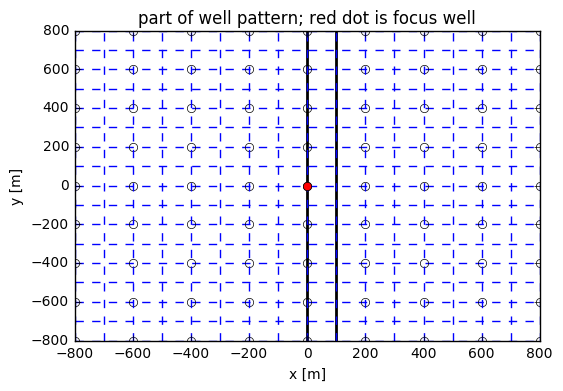

In [10]:
%notebook inline
import numpy as np
from scipy.special import exp1
import matplotlib.pyplot as plt

w = 100 # m
L = 200 # m

Y = np.linspace(-4, 4, 9) * 1 * L
X = np.linspace(-4, 4, 9) * 2 * w
Xm = 0.5 * (X[:-1] + X[1:])
Ym = 0.5 * (Y[:-1] + Y[1:])

fig, ax = plt.subplots()

ax.plot(0 * np.ones_like(Y), Y, 'k', lw=2)
ax.plot(w * np.ones_like(Y), Y, 'k', lw=2)
ax.set_title('part of well pattern; red dot is focus well')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

for y in Y:
    ax.plot(X[[0, -1]], [y, y], 'b--')
    for x in X:
        ax.plot(x, y, 'ro', markerfacecolor='none')
for ym in Ym:        
    ax.plot(X[[0, -1]], [ym, ym], 'b--')
for x in X:
    ax.plot([x, x], Y[[0, -1]], 'b--')
for xm in Xm:
    ax.plot([xm, xm], Y[[0, -1]], 'b--')
ax. plot(0, 0, 'ro') # the focus well

plt.show()

The figure is part of a well patterns that extends to infinity in all directions. The thick lines are the boundaries of the river bed. The installed wells are plotted in blue. The focus well is red. All other wells are virtual or mirror wells that together guarantee that the flow across the river-bed boundaries is always zero.

All blue dashed lines are water divides.

If we let $x$ run from 0 to 100 m and $y$ from 0 to 100 m, then our axes span only one of the quadrants between water divides.

The flow is 0.5 L/s for 8 h/d or Q = 14.4 m3/d. However we have to fill in 2 Q to take into consideration that the well extrats half its flow outside the river bed as can be seen in the figure above.

Using the Theis well function, we can compute the head when we extract a constant rate from the wells from $t=0$. The solution will be transient and will cause the riverbed to permanently loose water. Such a computation gives the result for the case that there is no supply of water at all.

Using the Theis well function is a compromise, because it assumes a constant transmissivity, which we don't have when the aquifer has a free declining water table.

Also the well will have a seepage face, which cause the interior of the well be become dry, while the water outside the well may still be substantial. The water drips down along the interior of the well. But we don't have to consider partial penetration. The head computed is valide for the head along the bottom of the aquifer.

We can set as a boundary condition that the head equals the bottom of the aquifer. This can be reached when the well is dug actually deeper than the river bed, into the underlying bedrock, such that the pump can be installe while the head is at the bottom of the aquifer. In this case the total water will drip into the well, while inside the well there is no water level (head equals bottom elevation of the well, with pump in blind part below aquifer bottom. At the same time the groundwater stands above the aquifer bottom outside the well.



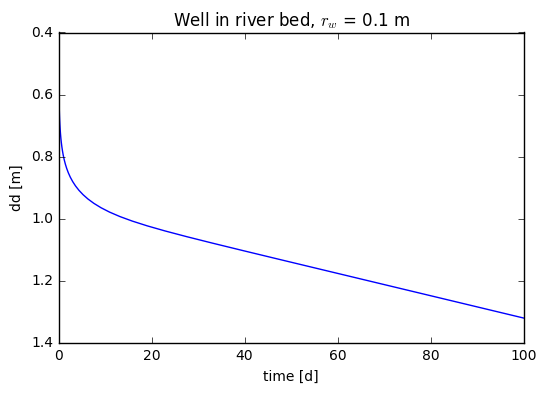

In [55]:
# well pattern
kD  = 1 * 30
S = 0.2
Q = 2 * 0.5 * 3.6 * 8# m3/d  (0.5 L/s for 8h/d)
x0 = 0.
y0 = 0.

N = 10
x = np.linspace(-2* N * w, 2* N * w, 2 * N + 1)
y = np.linspace(-2* N * w, 2* N * w, 2 * N + 1)
X, Y = np.meshgrid(x, y)

rw = 0.1 # well radius
R = np.fmax(np.sqrt((X - x0)**2 + (Y - y0)**2), rw)

times = np.logspace(-2, 2, 51)
s = np.zeros_like(times)
for i, t in enumerate(times):
    u = R**2 * S / (4 * kD * t)
    s[i] += np.sum(Q / (4 * np.pi * kD) * exp1(u))
    
fig, ax = plt.subplots()
ax.set_xlabel('time [d]')
ax.set_ylabel('dd [m]')
ax.set_title('Well in river bed, $r_w$ = {} m'.format(rw))
ax.plot(times, s)
ax.invert_yaxis()
plt.show()

Balance

The decline of the water level is

$$ \frac {\partial h} {\partial t} = \frac {2 Q} { A S} = \frac {2 \times 14.4} {200\times200\times0.2} = 0.0036 \,m/d= 0.36 m/(100d)$$

Let's compare this with the decline in the graph above:


In [56]:
decline_rate = np.diff(np.interp([50, 100], times, s))[0]/50 # decline rate over last 50 days
print('Decline rate over the last 50 days is = {:.3g} m/(100d)'.format(100 * decline_rate))

Decline rate over the last 50 days is = 0.36 m/(100d)


So we see that this matches the hand-calculation.

So the approach shows what happens of you install a well at one side of the 100 m wide river bed, you do that every 200 m, and extract 0.5 L/d for 8h/d from each of them. There is an initial rapid decline due to the fact that we have a well, which causes the steamlines to converge. After that the water level declines like it would in a bathtub, i.e uniformly.

Clearly if you have only one m of water in the riverbed, the water level cannot be pulled down by more than 1 m as the river bed would be empty as far as the well is concerned. We see that with the small well installed, we have 1 m decline already in 10 days. This makes nobody happy.

An alternative would be ton install a wider well or a drain hat the bottom of a given length. This could be simulated by the same method, but replacing the drain of length $b$ by a well with a representative radius. Say of the same circumference. Or with a circumference that equals twice the length of the drain. If our drain is 3 m long this yields

$$ R = \frac {2 \times 3 \, m} { 2 \pi} = 0.95 \, m$$

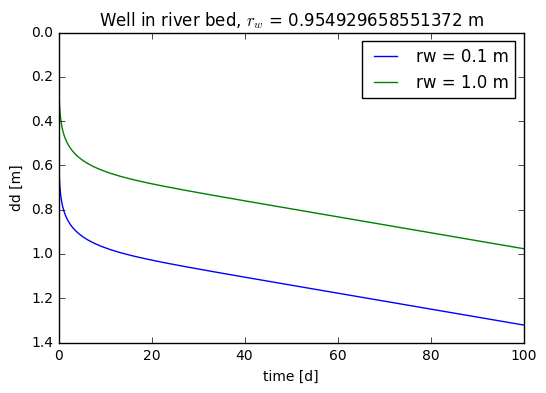

In [59]:
# situation with drain (circumference = 6 m)
N = 10
x = np.linspace(-2* N * w, 2* N * w, 2 * N + 1)
y = np.linspace(-2* N * w, 2* N * w, 2 * N + 1)
X, Y = np.meshgrid(x, y)

rw = 6 / (2 * np.pi) # well radius
R = np.fmax(np.sqrt((X - x0)**2 + (Y - y0)**2), rw)

times = np.logspace(-2, 2, 51)
s2 = np.zeros_like(times)
for i, t in enumerate(times):
    u = R**2 * S / (4 * kD * t)
    s2[i] += np.sum(Q / (4 * np.pi * kD) * exp1(u))
    
fig, ax = plt.subplots()
ax.set_xlabel('time [d]')
ax.set_ylabel('dd [m]')
ax.set_title('Well in river bed, $r_w$ = {} m'.format(rw))
ax.plot(times, s, label='rw = 0.1 m')
ax.plot(times, s2, label='rw = 1.0 m')
ax.invert_yaxis()
ax.legend(loc='best')
plt.show()

We see that with a drain the drawdown after 100 days is 0.98 m while that with the small well was 1.32 m. With the drain, the initial drawdown is smaller, but after this initial period, the decline rate is the same in both cases. The final drawdown is still large compared to the initial water layer thickness. Therefore, we should take into consideration the decline of  the transmissity during pumping, caused by the decline of the water table. This is easy but bypassed for now.

Clearly, without a drain, the extraction of the desired water amount would fail because the initial water table decline forbids that. With a drain of about 3 m length, there is still 60 cm initial water decline, but the aquifer is not immediately dry. So if you have water to fill up the river bed more or less regularly, so that the decline due to pumpping is compensated, the drain should work. But the small well doesn't.


>With regards

>Theo Olsthoorn 12/1/2017